In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import acos, cos, sin, asin, sqrt, pi
from datetime import datetime
from matplotlib import pyplot

In [16]:
cdf = pd.read_csv("D:/Users/Visitor/World Services/Python/Data/click_data.csv")
idf = pd.read_csv("D:/Users/Visitor/World Services/Python/Data/impression_data.csv")


In [17]:
idf.merge(cdf, how = 'inner', on = 'event_id').shape

(500, 9)

In [3]:
cdf.head()

,event_id,timestamp,event,latitude,longitude
0,90eccf8a-3365-488e-8bed-a76e6b00c817,1674193481,click,53.811679,-1.500
1,9a376add-88b9-484f-aafd-532ee45c8162,1673591862,click,54.327020,-2.746
2,e1d6ba80-c54e-4dbd-af50-e9c850d5a362,1674279977,click,51.007717,-1.269
3,f9832007-4eec-472a-bc69-fe8a43c89329,1673662721,click,53.392018,-2.198
4,41c30dec-e51f-4c8e-87c5-372364ac1617,1673175740,click,52.996029,-2.134


In [4]:
idf.head()

,event_id,event,timestamp,latitude,longitude
0,676a9e50-14b1-4761-bfa0-69ae4d4f9673,impression,1672578364,53.928281,-2.995
1,25dbb0d5-fcfe-4309-8131-c577dab35422,impression,1673069529,53.233343,-1.408
2,aba4d2e7-eb19-4058-8197-1d13b1f2aef6,impression,1672931568,51.634730,-0.133
3,0b56fe32-5f66-4572-8464-d2f4eab2b5e2,impression,1673199359,54.768000,-6.252
4,c5fee807-86a4-4e99-a7e4-f034385953b8,impression,1672851494,55.962784,-3.315


In [18]:
# Rearrange columns for click data

cdf = cdf[['event_id', 'event', 'timestamp', 'latitude', 'longitude']]

In [19]:
# Combine the click data and impression data and sort it

df = pd.concat([idf, cdf], axis = 0).sort_values(['event_id','event'], ascending = [True, False])

In [7]:
df.shape

(50000, 5)

In [8]:
df.head()

,event_id,event,timestamp,latitude,longitude
18367,0001427e-0c58-4c53-b19c-28ba908c42f8,impression,1673065068,57.065623,-2.7920
2756,000229a7-d8da-4e09-9954-af8f67870757,impression,1674043626,51.485971,-1.0590
12436,00024dcf-7c89-40f4-9983-98ae688c2646,impression,1674660736,51.744923,-2.2180
42111,00041d32-f035-4275-a9b9-0ddf4088fbe6,impression,1674802321,51.905883,-2.1090
7276,00068bf7-60fd-48cb-859e-22ba00f25315,impression,1674533014,52.454296,0.2924


In [20]:
# Find multiple events

# Create pivot table to group by event id and count

df_mult = df.groupby(['event_id'])['event'].agg([len]).reset_index()

# Create a list of event ids with multiple events

mult_event_id = df_mult[df_mult['len'] > 1]['event_id'].to_list()

In [21]:
# Find all the events that have impression and click

impression = df[(df['event_id'].isin(mult_event_id)) & (df['event'].str.lower() == 'impression')]

click = df[(df['event_id'].isin(mult_event_id)) & (df['event'].str.lower() == 'click')]

# Join the data together

iClick = impression.merge(click, how = 'inner', on = 'event_id')

iClick.columns = ['imp_event_id', 'imp_event', 'imp_timestamp', 'imp_latitude', 'imp_longitude', 'clk_event', 'clk_timestamp', 'clk_latitude', 'clk_longitude']

# Take the time difference between the click and impression

iClick['seconds'] = iClick['clk_timestamp'] - iClick['imp_timestamp']


In [22]:
# Convert seconds to hours in another column

iClick['hours'] = iClick['seconds'] / 3600

[Text(0.5, 1.0, 'Histogram of Impression Latitude')]

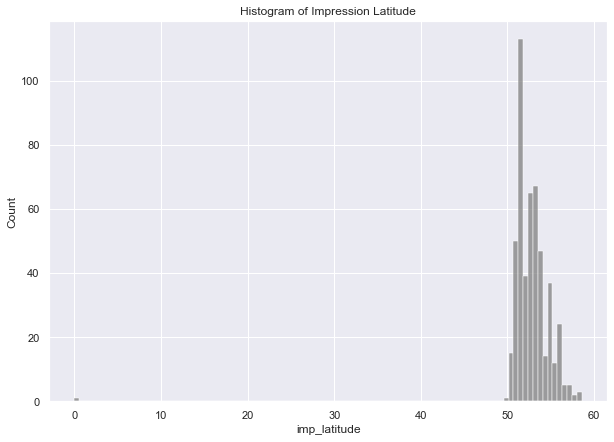

In [24]:
# Histogram plot of impression latitude

sns.set(rc={'figure.figsize':(10,7)})

sns.histplot(data = iClick, x = 'imp_latitude', color = 'gray').set(title = 'Histogram of Impression Latitude')

[Text(0.5, 1.0, 'Histogram of Impression Longitude')]

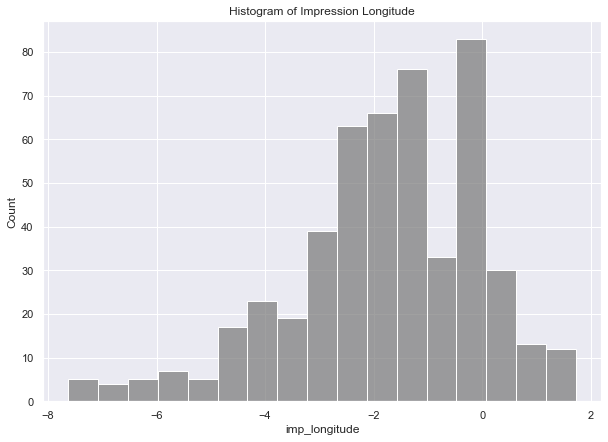

In [28]:
# Histogram plot of impression longitude

sns.set(rc={'figure.figsize':(10,7)})

sns.histplot(data = iClick, x = 'imp_longitude', color = 'gray').set(title = 'Histogram of Impression Longitude')

[Text(0.5, 1.0, 'Histogram of Click Latitude')]

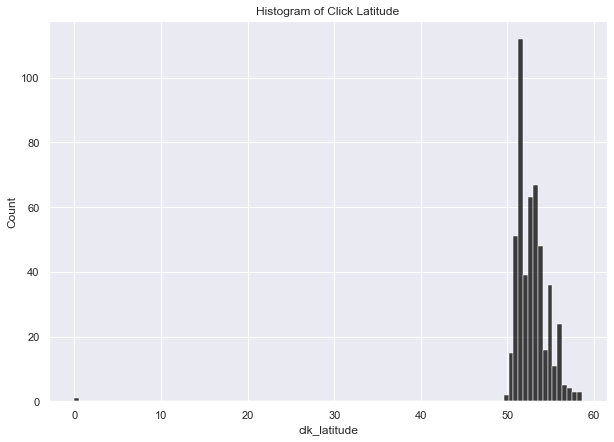

In [30]:
# Histogram plot of click latitude

sns.set(rc={'figure.figsize':(10,7)})

sns.histplot(data = iClick, x = 'clk_latitude', color = 'black').set(title = 'Histogram of Click Latitude')

[Text(0.5, 1.0, 'Histogram of Click Longitude')]

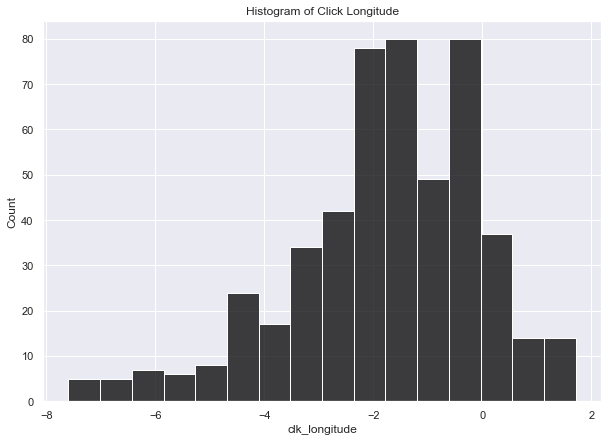

In [31]:
# Histogram plot of click longitude

sns.set(rc={'figure.figsize':(10,7)})

sns.histplot(data = iClick, x = 'clk_longitude', color = 'black').set(title = 'Histogram of Click Longitude')

In [23]:
# Finding the outlier latitude

iClick[(iClick['imp_latitude'] == 0) | (iClick['clk_latitude'] == 0)]

,imp_event_id,imp_event,imp_timestamp,imp_latitude,imp_longitude,clk_event,clk_timestamp,clk_latitude,clk_longitude,seconds,hours
149,49635c22-7333-44be-bf29-0b2957aa3ed7,impression,1674529640,0.0,0.0,click,1674589692,0.0,0.0,60052,16.681111


In [24]:
# Remove outlier as latitude = 0, longitude = 0 is null island

iClickdf = iClick[iClick['imp_latitude'] != 0]


[Text(0.5, 1.0, 'Histogram of Impression Latitude after outlier removal')]

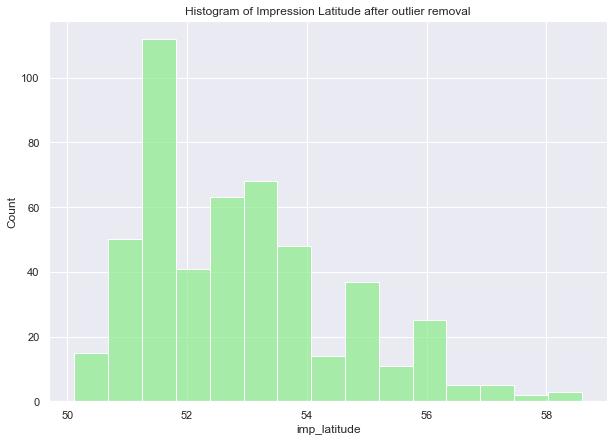

In [41]:
# Histogram plot of impression latitude after removal of outlier

sns.set(rc={'figure.figsize':(10,7)})

sns.histplot(data = iClickdf, x = 'imp_latitude', color = 'lightgreen').set(title = 'Histogram of Impression Latitude after outlier removal')

[Text(0.5, 1.0, 'Histogram of Click Latitude after outlier removal')]

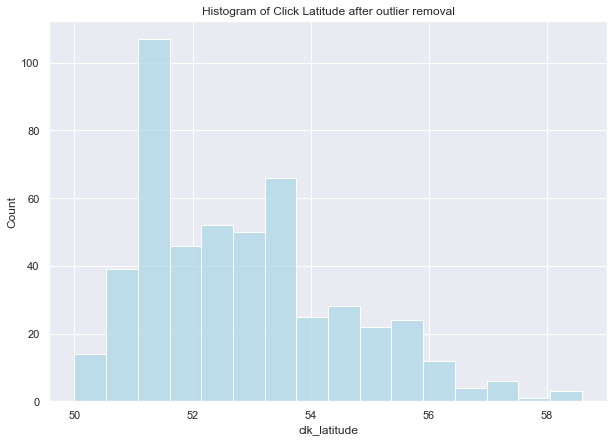

In [40]:
# Histogram plot of click latitude after removal of outlier

sns.set(rc={'figure.figsize':(10,7)})

sns.histplot(data = iClickdf, x = 'clk_latitude', color = 'lightblue').set(title = 'Histogram of Click Latitude after outlier removal')

[Text(0.5, 1.0, 'Histogram of time difference in seconds')]

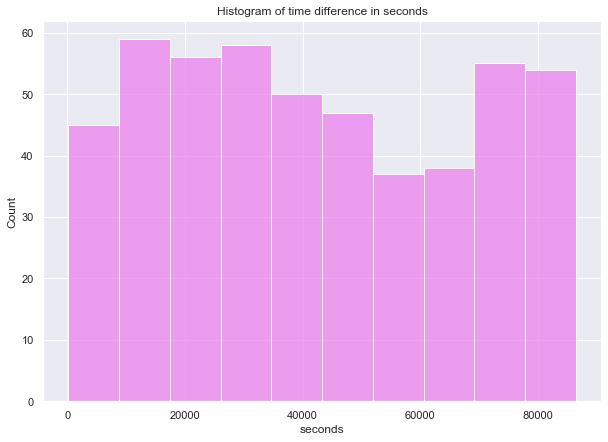

In [43]:
# Histogram plot of time difference in seconds

sns.set(rc={'figure.figsize':(10,7)})

sns.histplot(data = iClickdf, x = 'seconds', color = 'violet').set(title = 'Histogram of time difference in seconds')

In [25]:
# Create distance formula between longitude and latitude in meters

def distance(lat1, lon1, lat2, lon2):
    p = pi/180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 12742 * asin(sqrt(a))*1000

In [26]:
# Calculate distance and create a column

iClickdf['meter'] = iClickdf.apply(lambda x: distance(x['imp_latitude'], x['imp_longitude'], x['clk_latitude'], x['clk_longitude']), axis = 1)


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
# Convert meters to km

iClickdf['km'] = iClickdf['meter']/1000

# Create distance per time

iClickdf['meters_per_hr'] = iClickdf['meter'] / iClick['hours']

iClickdf['km_per_hr'] = iClickdf['km'] / iClick['hours']

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [28]:
iClickdf.head()

,imp_event_id,imp_event,imp_timestamp,imp_latitude,imp_longitude,clk_event,clk_timestamp,clk_latitude,clk_longitude,seconds,hours,meter,km,meters_per_hr,km_per_hr
0,009751f5-fb31-4289-81d8-fc1e2d081cb1,impression,1673743286,51.930807,-2.404,click,1673764631,51.930400,-2.405,21345,5.929167,82.153704,0.082154,13.855860,0.013856
1,009e0998-678c-4be5-9b4b-e02df8a713e8,impression,1673515173,53.005340,-2.165,click,1673535927,53.010296,-2.156,20754,5.765000,816.264673,0.816265,141.589709,0.141590
2,00a0bd9e-1690-48a4-910f-8173c4a8b5a4,impression,1673218989,51.648776,-0.422,click,1673254912,51.648776,-0.422,35923,9.978611,0.000000,0.000000,0.000000,0.000000
3,00a707a6-0635-49f7-a43a-b1ef29840104,impression,1674002717,53.377000,-3.118,click,1674057098,53.375198,-3.128,54381,15.105833,692.946531,0.692947,45.872777,0.045873
4,00e695f3-9ef4-46a0-82a6-05f8d66307f8,impression,1673554910,57.664668,-2.520,click,1673562082,57.665259,-2.521,7172,1.992222,88.633317,0.088633,44.489674,0.044490


[Text(0.5, 1, 'Heatmap Correlation Map')]

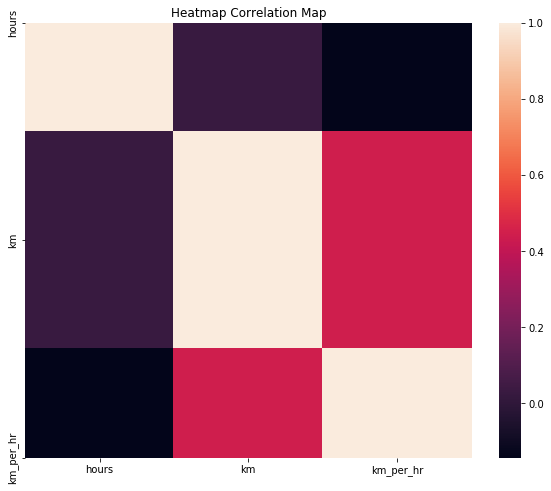

In [29]:
# Heatmap Correlation Matrix

dim = (10, 8)

fig, ax = pyplot.subplots(figsize = dim)

sns.heatmap(iClickdf[['hours','km','km_per_hr']].corr()).set(title = 'Heatmap Correlation Map')

[Text(0.5, 1.0, 'Scatterplot of Distance (km) vs Hours spent from Impression to Click')]

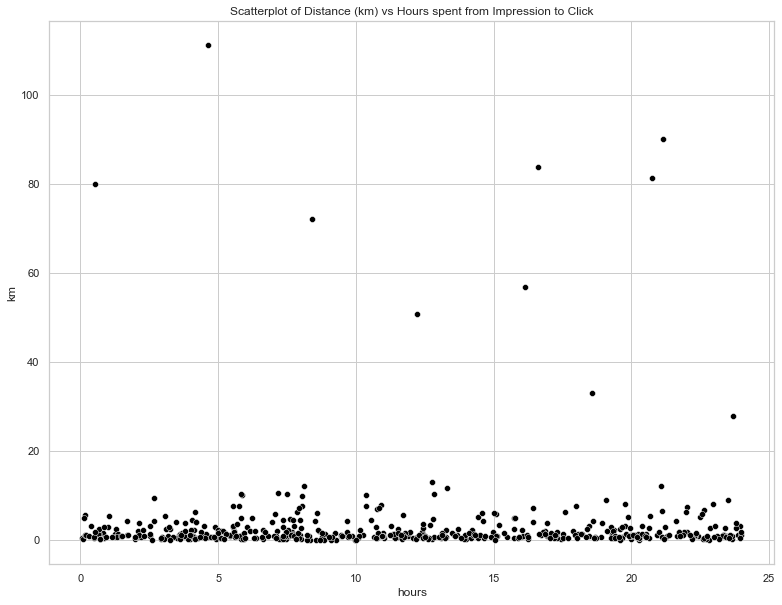

In [59]:
# Create scatterplot to find outliers

dim = (13, 10)

fig, ax = pyplot.subplots(figsize = dim)

ax.grid(True)

sns.scatterplot(data = iClickdf, x = 'hours', y = 'km', color = 'black', ).set(title = 'Scatterplot of Distance (km) vs Hours spent from Impression to Click')

[Text(0.5, 1.0, 'Boxplot of Distance')]

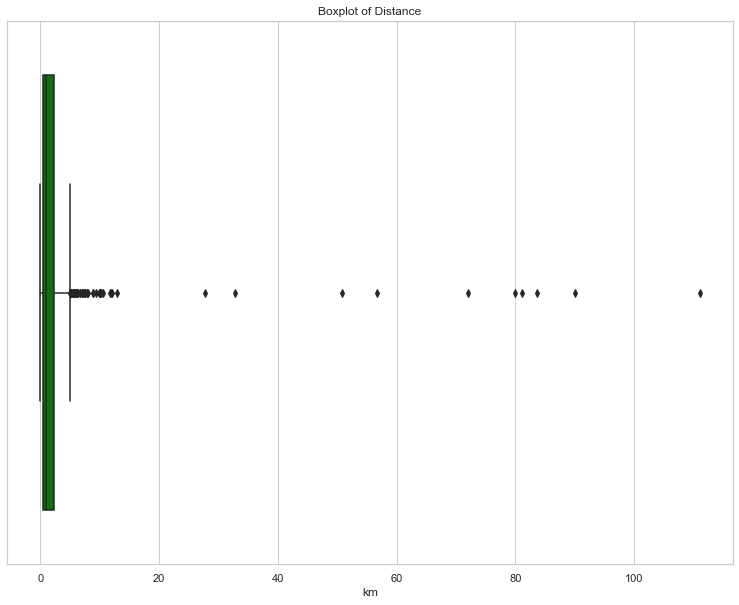

In [52]:
# Create boxplot to find outliers

dim = (13, 10)

fig, ax = pyplot.subplots(figsize = dim)

sns.boxplot(x = iClickdf['km'], color = 'green').set(title = "Boxplot of Distance")


# Segment the data by distance and kmph

In [42]:
# Create 3 segments
# Segment 1: Distance = 0, this means person was stable or at home
# Segment 2: Kmph <= 5, indicate walking
# Segment 3: Kmph > 5, this indicates person is in vehicle

iClickdf['Setting'] = np.where(iClickdf['km_per_hr'] == 0, 'Stable',
                              np.where(iClickdf['km_per_hr'] <= 5, 'Walking',
                                    np.where(iClickdf['km_per_hr'] > 5, 'Vehicle', 'Issue')))

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
# Create pivot table

summary = iClickdf.groupby(['Setting'])['hours','km','km_per_hr'].agg([np.mean])

summary.reset_index(inplace = True)
summary.columns = summary.columns.droplevel(0)
summary.columns = ['Setting','Avg hours','Avg km', 'Avg kmph']

summary

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Setting,Avg hours,Avg km,Avg kmph
0,Stable,12.448827,0.000000,0.000000
1,Vehicle,3.210861,36.680158,28.702190
2,Walking,11.849802,2.552326,0.332745


In [84]:
# Count of setting

setting_count = iClickdf.groupby(['Setting'])['imp_event_id'].agg([len])

setting_count.columns = ['Count']
setting_count.reset_index(inplace = True)

setting_count

,Setting,Count
0,Stable,9
1,Vehicle,10
2,Walking,480


In [86]:
# Combine both pvt tables together

summary_combine = pd.concat([summary, setting_count['Count']], axis = 1)

summary_combine.columns

summary_combine

,Setting,Avg hours,Avg km,Avg kmph,Count
0,Stable,12.448827,0.000000,0.000000,9
1,Vehicle,3.210861,36.680158,28.702190,10
2,Walking,11.849802,2.552326,0.332745,480


In [90]:
# Melt the pvt table to display in barchart

summary_melt = pd.melt(summary_combine, id_vars = 'Setting', var_name = 'Types', value_name = 'Metric')

summary_melt

,Setting,Types,Metric
0,Stable,Avg hours,12.448827
1,Vehicle,Avg hours,3.210861
2,Walking,Avg hours,11.849802
3,Stable,Avg km,0.000000
4,Vehicle,Avg km,36.680158
5,Walking,Avg km,2.552326
6,Stable,Avg kmph,0.000000
7,Vehicle,Avg kmph,28.702190
8,Walking,Avg kmph,0.332745
9,Stable,Count,9.000000


In [91]:
# Factorplot

sns.factorplot(x = "Setting", y = 'Metric', hue = 'Types', data = summary_melt, kind = 'bar').set(title = "Bar Chart for metrics")

AttributeError: module 'seaborn' has no attribute 'factorplot'

# Elbow Method and K Means Algorithm

In [32]:
# Data preprocessing

from sklearn.preprocessing import StandardScaler

# Standardize data

scale = StandardScaler()

scale_data = scale.fit_transform(iClickdf[['km','hours','km_per_hr']])

scale_data


array([[-0.3034872 , -0.82391097, -0.12084637],
       [-0.23180485, -0.84740026, -0.10333341],
       [-0.31150911, -0.24450848, -0.12274608],
       ...,
       [-0.29561352, -1.5728656 , -0.0906192 ],
       [-0.0380534 , -1.54870065,  0.32185641],
       [ 0.64767917, -0.52204776,  0.04479101]])

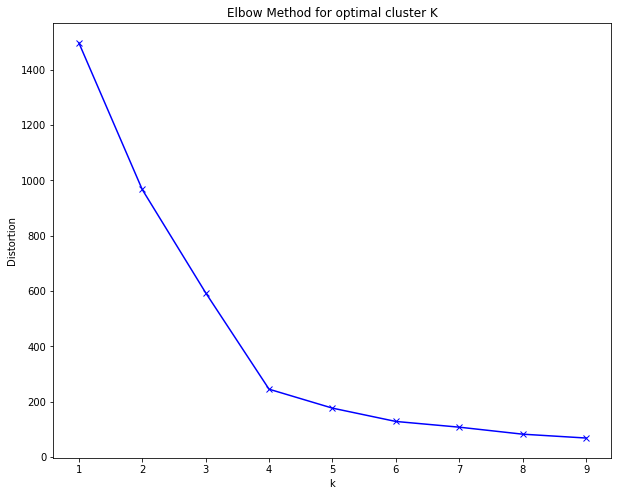

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# K means elbow method

lst = []

K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(scale_data)
    lst.append(kmeanModel.inertia_)
    
plt.figure(figsize=(10,8))
plt.plot(K, lst, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method for optimal cluster K')
plt.show()

In [34]:
# Kmeans using cluster = 4

kmeanModel = KMeans(n_clusters = 4)
kmeanModel.fit(scale_data)

iClickdf['k_means'] = kmeanModel.predict(scale_data)


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
# Create summary of kmeans

kmeans_summary = pd.concat([iClickdf.groupby(['k_means'])[['hours','km','km_per_hr']].agg([np.mean]),
                           iClickdf['k_means'].value_counts()],
                          axis = 1)

kmeans_summary.columns = ['Avg hrs', 'Avg km', 'Avg Kmph', 'Count']

kmeans_summary

,Avg hrs,Avg km,Avg Kmph,Count
0,18.313492,2.106208,0.118022,224
1,6.102681,1.853040,0.803046,267
2,0.524444,79.954576,152.455759,1
3,14.270079,77.915914,7.633389,7


In [44]:
iClickdf[iClickdf['Setting'] == 'Stable'][['imp_event_id','imp_latitude','imp_longitude','clk_latitude','clk_longitude','imp_event','hours','km','km_per_hr','Setting','k_means']]

,imp_event_id,imp_latitude,imp_longitude,clk_latitude,clk_longitude,imp_event,hours,km,km_per_hr,Setting,k_means
2,00a0bd9e-1690-48a4-910f-8173c4a8b5a4,51.648776,-0.422,51.648776,-0.422,impression,9.978611,0.0,0.0,Stable,1
38,150d1122-43cd-4a9a-9bd7-fea633fa4db9,50.916207,-0.264,50.916207,-0.264,impression,8.556389,0.0,0.0,Stable,1
111,3a60a071-87b6-465b-8b51-89686cb0ab1e,53.693463,-2.207,53.693463,-2.207,impression,22.834167,0.0,0.0,Stable,0
206,68655d7a-4f22-4933-8532-c199a3e4c56f,51.550839,-0.146,51.550839,-0.146,impression,9.078611,0.0,0.0,Stable,1
207,68bdbf2d-36bf-4cac-ab94-46c5e92e7788,53.489325,-2.264,53.489325,-2.264,impression,15.055278,0.0,0.0,Stable,0
298,9a376add-88b9-484f-aafd-532ee45c8162,54.327020,-2.746,54.327020,-2.746,impression,10.013333,0.0,0.0,Stable,1
304,9c084fd1-f719-4259-8071-4522c5488359,54.977728,-2.088,54.977728,-2.088,impression,19.579167,0.0,0.0,Stable,0
411,d187f581-6717-4154-9a06-49a94358d053,51.510782,-0.217,51.510782,-0.217,impression,8.238611,0.0,0.0,Stable,1
456,e4767062-cd6b-4ba5-b1fc-6bf297f07d69,50.255270,-5.046,50.255270,-5.046,impression,8.705278,0.0,0.0,Stable,1
